The goal of this notebook is to find out if critic trained on different horizons do indeed result in the same learned values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import torch

/home/ignat/.miniconda3/envs/warp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filepaths = ["/home/ignat/git/SHAC/scripts/outputs/2023-08-26/14-06-15/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/14-59-25/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-03-58/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-05-59/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-07-53/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-09-32/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-10-53/logs/truncation_analysis_0.npz",
             "/home/ignat/git/SHAC/scripts/outputs/2023-08-26/15-14-36/logs/truncation_analysis_0.npz",
            ]
states = []
for fp in filepaths:
    data = np.load(fp)
    states.append(data["states"].reshape((-1, data["states"].shape[-1])))
states = np.concatenate(states)
states.shape

(8388608, 11)

In [3]:
# load an assortment of critics
data = pd.DataFrame({"horizon":[20]*5 + [22]*5 + [24]*5 + [26]*5 + [28]*5 + [32]*5 + [34]*5 + [36]*5,
              "reward": [4819, 4827, 4797, 4803, 4764,
                        4835, 4818, 4815, 4830, 4789,
                        4820, 4825, 4815, 4840, 4826,
                        4853, 4832, 4850, 4859, 4855,
                        4814, 4849, 4833, 4831, 4832,
                        4866, 4872, 4857, 4836, 4888,
                        4877, 4870, 4870, 4862, 4826,
                        4854, 4871, 4871, 4871, 4894],
              "file": ["/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-03-38/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-03-38/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-03-38/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-03-38/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-03-38/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-05/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-05/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-05/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-05/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-05/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-36/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-36/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-36/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-36/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-36/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-40/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-40/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-40/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-40/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-40/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-44/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-44/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-44/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-44/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-44/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-52/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-52/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-52/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-52/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-52/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-56/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-56/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-56/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-56/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-04-56/4/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-05-04/0/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-05-04/1/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-05-04/2/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-05-04/3/logs/best_policy.pt",
                       "/home/ignat/git/SHAC/scripts/multirun/2023-08-17/12-05-04/4/logs/best_policy.pt"]})

# data['file'] = data.file.str.replace("truncation_analysis_0.npz", "best_policy.pt")[0]

data.head()

,horizon,reward,file
0,20,4819,/home/ignat/git/SHAC/scripts/multirun/2023-08-...
1,20,4827,/home/ignat/git/SHAC/scripts/multirun/2023-08-...
2,20,4797,/home/ignat/git/SHAC/scripts/multirun/2023-08-...
3,20,4803,/home/ignat/git/SHAC/scripts/multirun/2023-08-...
4,20,4764,/home/ignat/git/SHAC/scripts/multirun/2023-08-...


(4750.0, 4900.0)

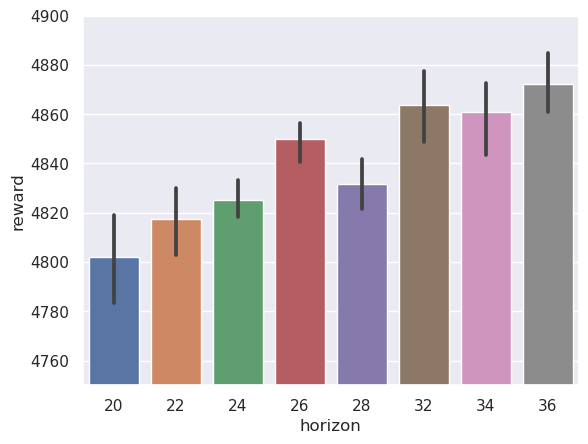

In [4]:
sns.barplot(data=data, x="horizon", y="reward")
plt.ylim((4750,4900))

In [15]:
# %matplotlib notebook

# fig, axs = plt.subplots(len(data.horizon.unique()))
batch_size = 4096
# results = {}
results = []

for k, h in enumerate(data.horizon.unique()):
    
    outcomes = []

    for idx, row in data[data.horizon == h].iterrows():
        critic = torch.load(row.file)[1]

        ys = []
        i = 0

        with torch.no_grad():
            while i*batch_size < len(states):
                x = torch.tensor(states[i*batch_size: (i+1)*batch_size], device="cuda")
                ys.append(critic(x))
                i += 1

            ys = torch.cat(ys)
            outcomes.append(ys)

        torch.cuda.empty_cache()

    outcomes = torch.cat(outcomes, dim=1).cpu()
    diff = torch.mean(outcomes.mean(dim=1) - outcomes.median(dim=1)[0])
    std = torch.std(outcomes, dim=1).mean()
#     results.update({h: [std, outcomes.mean(dim=1)]})
    results.append(outcomes)
    print(f"h={h} mean-median: {diff:.2f} overall std: {std:.2f}")
#     axs[k].hist(outcomes.flatten(), bins=30, density=True)
#     break

results = torch.cat(results, dim=1)

h=20 mean-median: -27.18 overall std: 55.06
h=22 mean-median: -0.63 overall std: 6.38
h=24 mean-median: -1.40 overall std: 8.14
h=26 mean-median: -11.65 overall std: 35.67
h=28 mean-median: -2.05 overall std: 7.82
h=32 mean-median: -2.27 overall std: 7.97
h=34 mean-median: -21.84 overall std: 43.84
h=36 mean-median: -0.62 overall std: 51.87


In [13]:
# mean vs median
torch.mean(results.mean(dim=1) - results.median(dim=1)[0])

tensor(-14.0537)

In [21]:
# measureing intra-horizon agreenment
seeds = 5
mean_vals = []
for i in range(0, results.shape[1], seeds):
    mean_vals.append(results[:, i: i+seeds])
mean_vals = torch.stack(mean_vals)
std = torch.std(mean_vals, dim=0).mean()
diff = torch.mean(mean_vals.mean(dim=1) - mean_vals.median(dim=1)[0])
print(f"overall diff {diff:.2f} std {std:.2f}")

0
5
10
15
20
25
30
35
overall diff -21.13 std 36.24


<IPython.core.display.Javascript object>


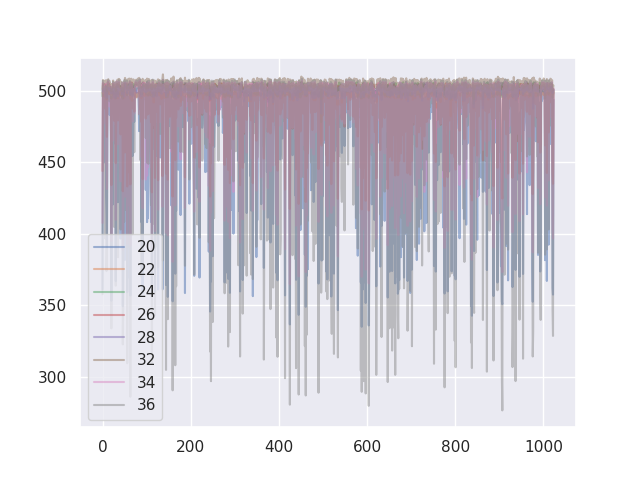

In [163]:
i = 300
for k,v in results.items():
    std, y = v
    plt.plot(y[i*1024: (i+1)*1024], label=k, alpha=0.5)
plt.legend()

### Group by rewards instead of horizon and see if we still get matching value estimates

<Axes: xlabel='horizon', ylabel='reward'>

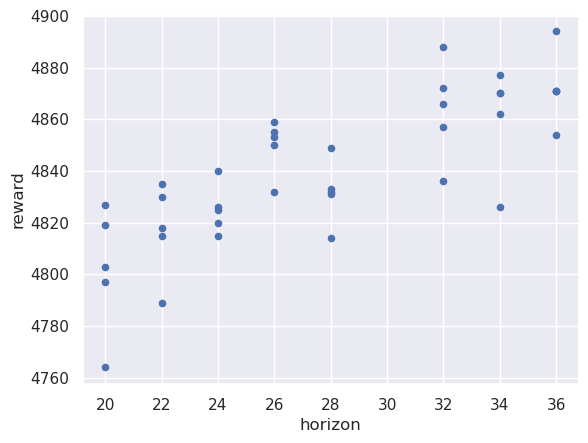

In [8]:
data.plot.scatter(x="horizon", y="reward")

In [29]:
subset = data[(data.reward > 4825) & (data.reward<4840)]

# mean vs median
torch.mean(results.mean(dim=1) - results.median(dim=1)[0])

batch_size = 4096
results = []
results_28 = []

for idx, row in subset.iterrows():
    critic = torch.load(row.file)[1]

    ys = []
    i = 0

    with torch.no_grad():
        while i*batch_size < len(states):
            x = torch.tensor(states[i*batch_size: (i+1)*batch_size], device="cuda")
            ys.append(critic(x))
            i += 1

        ys = torch.cat(ys)

    results.append(ys)
    if row.horizon == 28:
        results_28.append(ys)
    torch.cuda.empty_cache()
results = torch.cat(results, dim=1).cpu()
results_28 = torch.cat(results_28, dim=1).cpu()

In [36]:
std_full = torch.std(results, dim=1).mean()
std_28 = torch.std(results_28, dim=1).mean()

print(f"std full {std_full.item():.2f}  std h=28 {std_28.item():.2f}")

std full 7.56  std h=28 5.04
